In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('talk')

# Import LISC code
from lisc import Counts
from lisc.utils import save_object, load_object
from lisc.plts.counts import plot_matrix
from lisc.plts.utils import get_cmap


# Count articles of aperiodic in brain vs sleep

In [241]:
# Initialize counts object
counts = Counts()

# Settings for literature collection
db = 'pubmed'

In [257]:
terms_a = [['brain', 'cortex'],['sleep', 'nap']]  
terms_b = [['EEG slope', 'EEG exponent']]
# Set terms lists, indicating they are separate lists with the 'A' and 'B' labels
counts.add_terms(terms_a, dim='A')
counts.add_terms(terms_b, dim='B')
inclusions = ['EEG','MEG','iEEG','electroencephalography', 'magnetoencephalography', 'intracranial electroencephalography', 'intracranial EEG']
# Collect co-occurrence data
counts.run_collection()

Unloading terms.
Unloading terms.


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


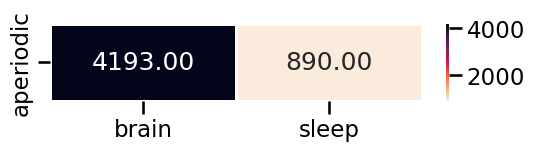

In [256]:
# Now the arrays are ready for plotting 
import pandas as pd
import seaborn
data_s = pd.DataFrame(counts.counts.T,columns=['brain','sleep'], index=['aperiodic'])
plt.figure(figsize=(6, 1))  
seaborn.heatmap(data_s,  annot=True, cmap='rocket_r', fmt='.2f', linewidths=1)

#plt.savefig('/home/b1044271/Columbia/Plots/NOV23/Literature_brain_sleep.svg')

# Different frequency bands

In [ ]:
# Initialize counts object
counts = Counts()

# NEW

In [466]:
start_year, end_year = 2009, 2023
years = list(range(start_year, end_year, 2))


year_counts=np.zeros([2,100])*np.nan

# Initialize counts object
counts = Counts()
terms_a = [['brain'], ['sleep']]  
terms_b = [['aperiodic exponent', 'spectral slope', 'spectral exponent', 'spectral parameterization', 'specparam', 'fooof', 'irasa', '1/f', '1/f-like', 'one-over f', 'aperiodic']]
inclusions = [['EEG','MEG','iEEG','electroencephalography', 'magnetoencephalography', 'intracranial electroencephalography', 'intracranial EEG'],['EEG','MEG','iEEG','electroencephalography', 'magnetoencephalography', 'intracranial electroencephalography', 'intracranial EEG']]
labels = ['brain', 'sleep']

# Set terms lists, indicating they are separate lists with the 'A' and 'B' labels
counts.add_terms(terms_a, dim='A')
counts.add_terms(terms_b, dim='B')
counts.add_terms(inclusions,  term_type='inclusions', dim='A')

# Collect co-occurrence data
i=0
for start_year in years:
    counts.run_collection( mindate=str(start_year) + '/01/01', maxdate=str(start_year+2 ) + '/12/31')
    year_counts[0:2,i] = np.squeeze(counts.counts)
    i=i+1


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


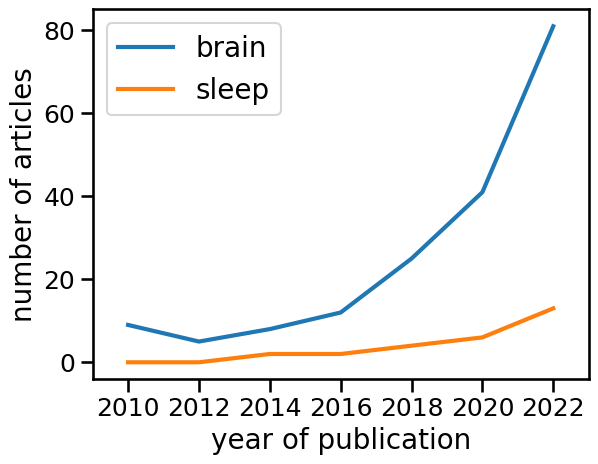

In [468]:
labels = ['brain', 'sleep']
years1 = np.array(years)+1

# Plot the popularity of each modality across the decades
plt.plot(years1, year_counts[0,0:7], label = 'brain', linewidth =3)
plt.plot(years1, year_counts[1,0:7], label = 'sleep', linewidth =3)
plt.legend(fontsize=20)
plt.xlim(2009,2023)
plt.xlabel('year of publication', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('number of articles', fontsize=20)
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/Literature_year.svg", dpi = 600)

# Get the articles

In [3]:
# Import the Words object, which is used for words collection
from lisc import Words

terms_a = [['spectral slope','spectral exponent', '1/f exponent', '1/f slope','aperiodic slope', 'aperiodic exponent', 'power-law exponent']]
inclusions_a =[['sleep']]

from lisc.collect import collect_words
# Collect words data, setting to collect data for at most 5 articles per term
results, meta_data = collect_words(terms_a, inclusions=inclusions_a, usehistory=False,
                                   save_and_clear=False, verbose=True)


/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [6]:
results[0].titles

['Neural complexity and the spectral slope characterise auditory processing in wakefulness and sleep.',
 'The utility of wearable headband electroencephalography and pulse photoplethysmography to assess cortical and physiological arousal in individuals with stress-related mental disorders.',
 'Post-training sleep modulates motor adaptation and task-related beta oscillations.',
 'Evaluation of putative signatures of consciousness using specific definitions of responsiveness, connectedness, and consciousness.',
 'Transcranial random noise stimulation combined with cognitive training for treating ADHD: a randomized, sham-controlled clinical trial.',
 'Altered brain dynamics index levels of arousal in complete locked-in syndrome.',
 'The maturation of aperiodic EEG activity across development reveals a progressive differentiation of wakefulness from sleep.',
 'Aperiodic brain activity and response to anesthesia vary in disorders of consciousness.',
 'Identification of atypical sleep microa

# Manual Counts reults
##1-40:1 , 1-45:2, 1-8:1, 10-40:1, 1-20:1, 0.5,50:1, 2-48:1, 30-45:3, 200-2000:1, 1-30:1, 20-45:1



# barplot

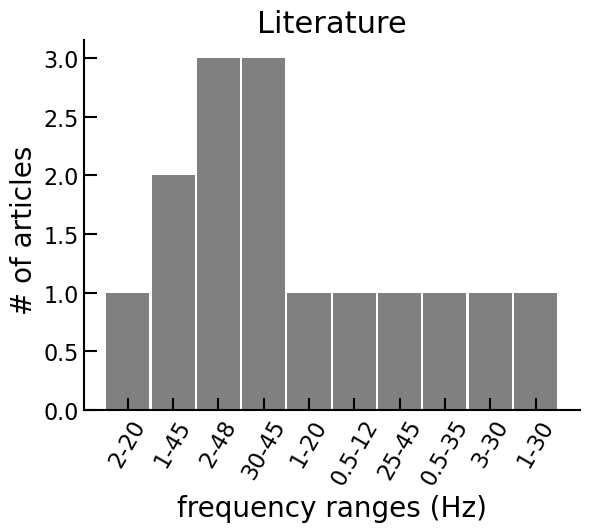

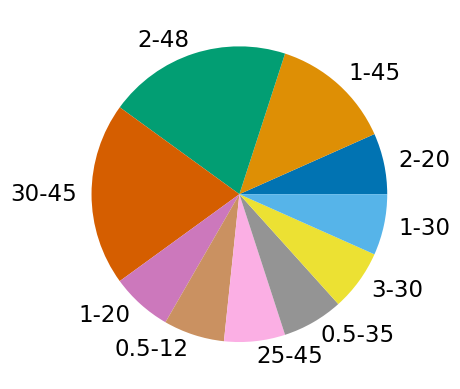

In [13]:
# Fixing random state for reproducibility
fig, ax = plt.subplots()

counts = [1,2,3,3,1,1,1,1,1,1]
total_counts = np.sum(counts)
percentage_counts = np.divide(counts,total_counts)*100
# Example data
 # '2-20', '1-45', '2-48', '30-45', '1-20' ,'0.5-12', '2-48', '30-45', '30-45', '25-45', '1-45', '0.5-35',
  #      '3-30', '2-48', '1-30']
freqs = ['2-20','1-45', '2-48','30-45','1-20','0.5-12','25-45','0.5-35','3-30','1-30']

y_pos = np.arange(len(freqs))

ax.bar(y_pos, counts, width=0.95,align='center', color = 'grey')
#ax.set_yticks(y_pos, labels=freqs)
ax.set_xlabel('frequency ranges (Hz)', fontsize = 20)
ax.set_ylabel('# of articles ', fontsize = 20)
ax.set_title('Literature', fontsize = 22)
plt.xticks(y_pos,freqs)


plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
plt.xticks(rotation=60)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/Literature_freqs_bar_counts.svg", dpi = 600 )

import seaborn as sns
fig, ax = plt.subplots()
ax.pie(percentage_counts, labels=freqs, colors = sns.color_palette('colorblind'))

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/Literature_freqs_pie.svg", dpi = 600 )